<a href="https://colab.research.google.com/github/ocarnathan/Titanic_Survival_Prediction_Model/blob/main/titantic_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
filepath1 = '/content/drive/MyDrive/titanic/train.csv'
filepath2 = '/content/drive/MyDrive/titanic/test.csv'
train = pd.read_csv(filepath1)
test = pd.read_csv(filepath2)
train.head()
train.describe()



Mounted at /content/drive


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
print('Gender')
women = train.loc[train.Sex == 'female']
exit()
#print(women)
women_survived = women['Survived']
#print(women_survived)
women_rate = sum(women_survived)/len(women_survived)
print(women_rate)

rich_women = women.loc[women.Pclass == 1]
rich_women_survived = rich_women['Survived']
rich_women_rate = sum(rich_women_survived)/len(rich_women_survived)
print(rich_women_rate)

men = train.loc[train.Sex == 'male']
men_survived = men['Survived']
men_rate = sum(men_survived)/len(men_survived)
print(men_rate)
print('Social class of men')
rich_men = men.loc[men.Pclass == 1]
rich_men_survived = rich_men['Survived']
rich_men_rate = sum(rich_men_survived)/len(rich_men_survived)
print(rich_men_rate)

mc_men = men.loc[men.Pclass == 2]
mc_men_survived = mc_men['Survived']
mc_men_rate = sum(mc_men_survived)/len(mc_men_survived)
print(mc_men_rate)

poor_men = men.loc[men.Pclass == 3]
poor_men_survived = poor_men['Survived']
poor_men_rate = sum(poor_men_survived)/len(poor_men_survived)
print(poor_men_rate)
print('age')
young = train.loc[train.Age < 18]
young_survived = young['Survived']
young_rate = sum(young_survived)/len(young_survived)
print(young_rate)

middle_age = train.loc[(train.Age >= 18) & (train.Age < 50)]
middle_age_survived = middle_age['Survived']
middle_age_rate = sum(middle_age_survived)/len(middle_age_survived)
print(middle_age_rate)

old = train.loc[train.Age >= 50]
old_survived = old['Survived']
old_rate = sum(old_survived)/len(old_survived)
print(old_rate)
print('young men and women')
young_women = young.loc[young.Sex == 'female']
young_women_survived = young_women['Survived']
young_women_rate = sum(young_women_survived)/len(young_women_survived)
print(young_women_rate)

young_men = young.loc[young.Sex == 'male']
young_men_survived = young_men['Survived']
young_men_rate = sum(young_men_survived)/len(young_men_survived)
print(young_men_rate)

('sibsp size')
couple = train.loc[train.SibSp == 1]
couple_survived = couple['Survived']
couple_rate = sum(couple_survived)/len(couple_survived)
print(couple_rate)

couple = train.loc[train.SibSp >= 2]
couple_survived = couple['Survived']
couple_rate = sum(couple_survived)/len(couple_survived)
print(couple_rate)
print('Social class')

rich = train.loc[train.Pclass == 3]
rich_survived = rich['Survived']
rich_rate = sum(rich_survived)/len(rich_survived)
print(rich_rate)

rich = train.loc[train.Pclass == 2]
rich_survived = rich['Survived']
rich_rate = sum(rich_survived)/len(rich_survived)
print(rich_rate)

rich = train.loc[train.Pclass == 1]
rich_survived = rich['Survived']
rich_rate = sum(rich_survived)/len(rich_survived)
print(rich_rate)

Gender
0.7420382165605095
0.9680851063829787
0.18890814558058924
Social class of men
0.36885245901639346
0.1574074074074074
0.13544668587896252
age
0.5398230088495575
0.38330170777988615
0.36486486486486486
young men and women
0.6909090909090909
0.39655172413793105
0.5358851674641149
0.2702702702702703
Social class
0.24236252545824846
0.47282608695652173
0.6296296296296297


In [ ]:
train['Title'] = train['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())
test['Title'] = test['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())
train.groupby(['Title'], as_index=False)['Survived'].mean()


,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [ ]:
train.groupby(['Title'], as_index=False)['Survived'].count()

,Title,Survived
0,Capt,1
1,Col,2
2,Don,1
3,Dr,7
4,Jonkheer,1
5,Lady,1
6,Major,2
7,Master,40
8,Miss,182
9,Mlle,2


In [ ]:
avg_mr_age = train.loc[train.Title == 'Mr']['Age'].mean()
avg_master_age = train.loc[train.Title == 'Master']['Age'].mean()
avg_miss_age = train.loc[train.Title == 'Miss']['Age'].mean()
avg_mrs_age = train.loc[train.Title == 'Mrs']['Age'].mean()
train['Age'] = np.where((train.Age.isnull() > 0) & (train.Title == 'Master'), avg_master_age, train.Age )
train['Age'] = np.where((train.Age.isnull() > 0) & (train.Title == 'Mr'), avg_mr_age, train.Age )
train['Age'] = np.where((train.Age.isnull() > 0) & (train.Title == 'Miss'), avg_miss_age, train.Age )
train['Age'] = np.where((train.Age.isnull() > 0) & (train.Title == 'Mrs'), avg_mrs_age, train.Age )
train['Age'] = np.where((train.Age.isnull() > 0) & (train.Title == 'Dr'), avg_mr_age, train.Age )

test['Age'] = np.where((test.Age.isnull() > 0) & (test.Title == 'Master'), avg_master_age, test.Age )
test['Age'] = np.where((test.Age.isnull() > 0) & (test.Title == 'Mr'), avg_mr_age, test.Age )
test['Age'] = np.where((test.Age.isnull() > 0) & (test.Title == 'Miss'), avg_miss_age, test.Age )
test['Age'] = np.where((test.Age.isnull() > 0) & (test.Title == 'Mrs'), avg_mrs_age, test.Age )
test['Age'] = np.where((test.Age.isnull() > 0) & (test.Title == 'Dr'), avg_mr_age, test.Age )


test.loc[test.Title == 'Rev']




,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0,NaN,S,Rev
164,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0,NaN,S,Rev


In [ ]:
test.groupby(['Title'], as_index=False).count()

,Title,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Col,2,2,2,2,2,2,2,2,2,2,2
1,Dona,1,1,1,1,1,1,1,1,1,1,1
2,Dr,1,1,1,1,1,1,1,1,1,1,1
3,Master,21,21,21,21,21,21,21,21,21,2,21
4,Miss,78,78,78,78,78,78,78,78,78,11,78
5,Mr,240,240,240,240,240,240,240,240,239,42,240
6,Mrs,72,72,72,72,72,72,72,72,72,32,72
7,Ms,1,1,1,1,0,1,1,1,1,0,1
8,Rev,2,2,2,2,2,2,2,2,2,0,2


In [ ]:
train['Title'] = train['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Don' : 'Noble',
    'Jonkheer' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'the Countess' : 'Noble',
    'Dr' : 'Medical',
    'Rev' : 'Clergy',
    'Mr' : 'Other',
    'Mrs' : 'Other',
    'Ms' : 'Other',
    'Miss' : 'Other',
    'Mlle' : 'Other',
    'Mme' : 'Other',
    'Master' : 'Other',
})
test['Title'] = test['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Don' : 'Noble',
    'Dona' : 'Noble',
    'Jonkheer' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'the Countess' : 'Noble',
    'Dr' : 'Medical',
    'Rev' : 'Clergy',
    'Mr' : 'Other',
    'Mrs' : 'Other',
    'Ms' : 'Other',
    'Miss' : 'Other',
    'Mlle' : 'Other',
    'Mme' : 'Other',
    'Master' : 'Other',
})
train.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Clergy,6,0.000000
1,Medical,7,0.428571
2,Military,5,0.400000
3,Noble,5,0.600000
4,Other,868,0.384793


In [ ]:
test.groupby(['Title'], as_index=False).count()

,Title,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Clergy,2,2,2,2,2,2,2,2,2,0,2
1,Medical,1,1,1,1,1,1,1,1,1,1,1
2,Military,2,2,2,2,2,2,2,2,2,2,2
3,Noble,1,1,1,1,1,1,1,1,1,1,1
4,Other,412,412,412,412,411,412,412,412,411,87,412


In [ ]:
train['Title'] = train['Title'].map({
    'Clergy':0, 'Medical':1, 'Military':2, 'Noble':3, 'Other':4
})
test['Title'] = test['Title'].map({
    'Clergy':0, 'Medical':1, 'Military':2, 'Noble':3, 'Other':4
})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rfc = RandomForestClassifier()
x_train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'],axis=1)
y_train = train['Survived']
x_train['Sex'] = x_train['Sex'].map({'male':0,'female':1})
#x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
rfc.fit(x_train,y_train)
x_test = test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
x_test['Sex'] = x_test['Sex'].map({'male':0,'female':1})
#x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())
y_pred = rfc.predict(x_test)
print(y_pred)
d = {
    'PassengerId': test['PassengerId'],
    'survived': y_pred
}
df = pd.DataFrame(d)
df.to_csv('/content/drive/MyDrive/output.csv', index=False)

[0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=5)
x_train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y_train = train['Survived']
x_train['Sex'] = x_train['Sex'].map({'male':0,'female':1})
#x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
#x_train['Embarked'] = x_train['Embarked'].fillna('S')
x_train['Embarked'] = x_train['Embarked'].map({'C':0,'S':1, 'Q':2})
x_train['Alone'] = np.where((x_train['Parch'] > 0) | (x_train['SibSp'] > 0), 0, 1 )

rfc.fit(x_train.drop(['SibSp', 'Parch'], axis=1),y_train)
x_test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
x_test['Sex'] = x_test['Sex'].map({'male':0,'female':1})
#x_test['Embarked'] = x_test['Embarked'].fillna('S')
x_test['Embarked'] = x_test['Embarked'].map({'C':0,'S':1, 'Q':2})
x_test['Alone'] = np.where((x_test['Parch'] > 0) | (x_test['SibSp'] > 0), 0, 1 )
#x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())
y_pred = rfc.predict(x_test.drop(['SibSp', 'Parch'],axis=1))
print(y_pred)
d = {
    'PassengerId': test['PassengerId'],
    'survived': y_pred
}
df = pd.DataFrame(d)
df.to_csv('/content/drive/MyDrive/output2.csv', index=False)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
from math import nan
from sklearn.ensemble import HistGradientBoostingClassifier
gbc = HistGradientBoostingClassifier()
x_train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y_train = train['Survived']
x_train['Sex'] = x_train['Sex'].map({'male':0,'female':1})
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_train['Embarked'] = x_train['Embarked'].map({'C':0,'S':1, 'Q':2})
x_train['Embarked'] = x_train['Embarked'].fillna(1)
x_train['Alone'] = np.where((x_train['Parch'] > 0) | (x_train['SibSp'] > 0), 0, 1 )
gbc.fit(x_train, y_train)
x_test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
x_test['Sex'] = x_test['Sex'].map({'male':0,'female':1})
x_test['Embarked'] = x_test['Embarked'].map({'C':0,'S':1, 'Q':2})
x_test['Alone'] = np.where((x_test['Parch'] > 0) | (x_test['SibSp'] > 0), 0, 1 )
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())
x_test['Embarked'] = x_test['Embarked'].fillna(1)
y_pred2 = gbc.predict(x_test)
print(y_pred2)
d = {
    'PassengerId': test['PassengerId'],
    'survived': y_pred2
}
df = pd.DataFrame(d)
df.to_csv('/content/drive/MyDrive/output3.csv', index=False)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
import xgboost
from sklearn.preprocessing import StandardScaler
x_train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y_train = train['Survived']
x_train['Sex'] = x_train['Sex'].map({'male':0,'female':1})

x_train['Embarked'] = x_train['Embarked'].map({'C':0,'S':1, 'Q':2})

x_train['Alone'] = np.where((x_train['Parch'] > 0) | (x_train['SibSp'] > 0), 0, 1 )
xgb = xgboost.XGBClassifier(objective= 'binary:logistic', n_estimators = 100, learning_rate = .1)

x_test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
x_test['Sex'] = x_test['Sex'].map({'male':0,'female':1})
x_test['Embarked'] = x_test['Embarked'].map({'C':0,'S':1, 'Q':2})
x_test['Alone'] = np.where((x_test['Parch'] > 0) | (x_test['SibSp'] > 0), 0, 1 )



xgb.fit(x_train, y_train)
y_pred3 = xgb.predict(x_test)
print(y_pred3)
d = {
    'PassengerId': test['PassengerId'],
    'survived': y_pred3
}
df = pd.DataFrame(d)
df.to_csv('/content/drive/MyDrive/output5.csv', index=False)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=np.float64(0.615848211066026), penalty='l1',
                   solver='liblinear')
x_train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y_train = train['Survived']
x_train['Sex'] = x_train['Sex'].map({'male':0,'female':1})
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_train['Embarked'] = x_train['Embarked'].map({'C':0,'S':1, 'Q':2})
x_train['Embarked'] = x_train['Embarked'].fillna(1)
x_train['Alone'] = np.where((x_train['Parch'] > 0) | (x_train['SibSp'] > 0), 0, 1 )


x_test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
x_test['Sex'] = x_test['Sex'].map({'male':0,'female':1})
x_test['Embarked'] = x_test['Embarked'].map({'C':0,'S':1, 'Q':2})
x_test['Alone'] = np.where((x_test['Parch'] > 0) | (x_test['SibSp'] > 0), 0, 1 )
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())
x_test['Embarked'] = x_test['Embarked'].fillna(1)
x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].median())

#print(x_train.dropna())
#print(x_test.dropna())
x_test.info()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
y_pred_lg = lg.fit(x_train_scaled, y_train).predict(x_test_scaled)
print(y_pred_lg)
d = {
    'PassengerId': test['PassengerId'],
    'survived': y_pred_lg
}
df = pd.DataFrame(d)
df.to_csv('/content/drive/MyDrive/output6.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    int64  
 8   Alone     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
"""
rfclf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rfclf, param_grid=param_grid, cv = 5)

x_train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y_train = train['Survived']
x_train['Sex'] = x_train['Sex'].map({'male':0,'female':1})

x_train['Embarked'] = x_train['Embarked'].map({'C':0,'S':1, 'Q':2})

x_train['Alone'] = np.where((x_train['Parch'] > 0) | (x_train['SibSp'] > 0), 0, 1 )
#rfc.fit(x_train,y_train)


grid_search.fit(x_train.drop(['SibSp', 'Parch'], axis=1), y_train)

print("Best params:", grid_search.best_params_)
print("Best cross validation:", grid_search.best_estimator_)"""



'\nrfclf = RandomForestClassifier()\nparam_grid = {\n    \'n_estimators\': [100, 200, 500],\n    \'max_depth\': [None, 5, 10, 20],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2],\n    \'bootstrap\': [True, False]\n}\n\ngrid_search = GridSearchCV(estimator=rfclf, param_grid=param_grid, cv = 5)\n\nx_train = train.drop([\'PassengerId\',\'Survived\',\'Name\',\'Ticket\',\'Cabin\'],axis=1)\ny_train = train[\'Survived\']\nx_train[\'Sex\'] = x_train[\'Sex\'].map({\'male\':0,\'female\':1})\n\nx_train[\'Embarked\'] = x_train[\'Embarked\'].map({\'C\':0,\'S\':1, \'Q\':2})\n\nx_train[\'Alone\'] = np.where((x_train[\'Parch\'] > 0) | (x_train[\'SibSp\'] > 0), 0, 1 )\n#rfc.fit(x_train,y_train)\n\n\ngrid_search.fit(x_train.drop([\'SibSp\', \'Parch\'], axis=1), y_train)\n\nprint("Best params:", grid_search.best_params_)\nprint("Best cross validation:", grid_search.best_estimator_)'

In [ ]:
"""lgclf = LogisticRegression()
param_grid = {
    'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}

grid_search = GridSearchCV(estimator=lgclf, param_grid=param_grid, cv = 3)

x_train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y_train = train['Survived']
x_train['Sex'] = x_train['Sex'].map({'male':0,'female':1})
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_train['Embarked'] = x_train['Embarked'].map({'C':0,'S':1, 'Q':2})
x_train['Embarked'] = x_train['Embarked'].fillna(1)
x_train['Alone'] = np.where((x_train['Parch'] > 0) | (x_train['SibSp'] > 0), 0, 1 )
#rfc.fit(x_train,y_train)


grid_search.fit(x_train.drop(['SibSp', 'Parch'], axis=1), y_train)

print("Best params:", grid_search.best_params_)
print("Best cross validation:", grid_search.best_estimator_)"""



'lgclf = LogisticRegression()\nparam_grid = {\n    \'penalty\':[\'l1\',\'l2\',\'elasticnet\',\'none\'],\n    \'C\' : np.logspace(-4,4,20),\n    \'solver\': [\'lbfgs\',\'newton-cg\',\'liblinear\',\'sag\',\'saga\'],\n    \'max_iter\'  : [100,1000,2500,5000]\n}\n\ngrid_search = GridSearchCV(estimator=lgclf, param_grid=param_grid, cv = 3)\n\nx_train = train.drop([\'PassengerId\',\'Survived\',\'Name\',\'Ticket\',\'Cabin\'],axis=1)\ny_train = train[\'Survived\']\nx_train[\'Sex\'] = x_train[\'Sex\'].map({\'male\':0,\'female\':1})\nx_train[\'Age\'] = x_train[\'Age\'].fillna(x_train[\'Age\'].mean())\nx_train[\'Embarked\'] = x_train[\'Embarked\'].map({\'C\':0,\'S\':1, \'Q\':2})\nx_train[\'Embarked\'] = x_train[\'Embarked\'].fillna(1)\nx_train[\'Alone\'] = np.where((x_train[\'Parch\'] > 0) | (x_train[\'SibSp\'] > 0), 0, 1 )\n#rfc.fit(x_train,y_train)\n\n\ngrid_search.fit(x_train.drop([\'SibSp\', \'Parch\'], axis=1), y_train)\n\nprint("Best params:", grid_search.best_params_)\nprint("Best cross va

              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000
               Sex  Survived
Sex       1.000000  0.543351
Survived  0.543351  1.000000
          Embarked  Survived
Embarked  1.000000 -0.126753
Survived -0.126753  1.000000
             SibSp  Survived
SibSp     1.000000 -0.035322
Survived -0.035322  1.000000
             Parch  Survived
Parch     1.000000  0.081629
Survived  0.081629  1.000000
            Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000
               Age  Survived
Age       1.000000 -0.077786
Survived -0.077786  1.000000
Survived      0   1
Pclass Sex         
1      0     77  45
       1      3  91
2      0     91  17
       1      6  70
3      0    300  47
       1     72  72
Survived       0    1
Parch SibSp          
0     0      374  163
      1       59   64
      2       12    4
      3        0    2
1     0       13   25
      1       23   34
      2        1    6
      3        7    0
      4    

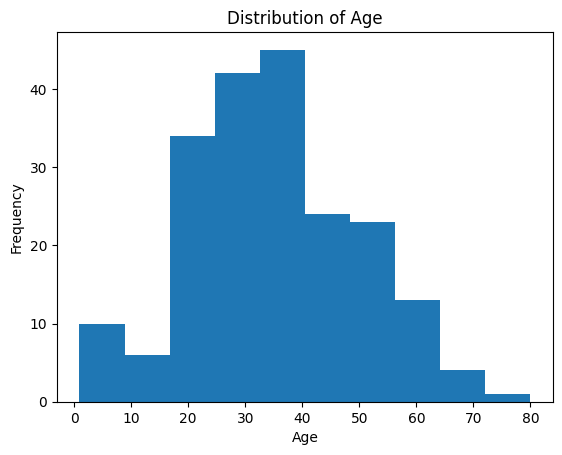

In [ ]:
gender = train
gender['Sex'] = gender['Sex'].map({'male':0,'female':1})
gender['Embarked'] = gender['Embarked'].map({'C':0,'S':1, 'Q':2})
print(train[['Fare', 'Survived']].corr())
print(gender[['Sex', 'Survived']].corr())
print(gender[['Embarked', 'Survived']].corr())
print(gender[['SibSp', 'Survived']].corr())
print(gender[['Parch', 'Survived']].corr())
print(gender[['Pclass', 'Survived']].corr())
print(gender[['Age', 'Survived']].corr())
print(pd.crosstab([gender['Pclass'], gender['Sex']], gender['Survived']))
print(pd.crosstab([gender['Parch'], gender['SibSp']], gender['Survived']))
gender = gender.dropna()
print(gender[['Age', 'Survived']].corr())
print(pd.crosstab([gender['Age']], gender['Survived']))
plt.hist(gender['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()